In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
books = pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
ChildBks     2000 non-null int64
YouthBks     2000 non-null int64
CookBks      2000 non-null int64
DoItYBks     2000 non-null int64
RefBks       2000 non-null int64
ArtBks       2000 non-null int64
GeogBks      2000 non-null int64
ItalCook     2000 non-null int64
ItalAtlas    2000 non-null int64
ItalArt      2000 non-null int64
Florence     2000 non-null int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
frequent_itemsets = apriori(books, min_support=0.05, max_len=3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(ItalCook, CookBks, GeogBks)"
72,0.0535,"(DoItYBks, RefBks, ArtBks)"
73,0.0585,"(DoItYBks, RefBks, GeogBks)"
74,0.0730,"(DoItYBks, GeogBks, ArtBks)"


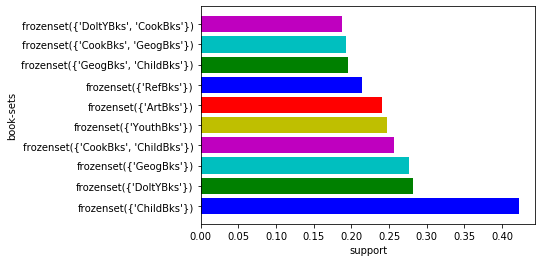

In [11]:
frequent_itemsets.sort_values('support', ascending = False,inplace=True)
plt.barh(list(range(1,11)),frequent_itemsets.support[1:11],color='bgcmyr');plt.yticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.ylabel('book-sets');plt.xlabel('support')
plt.show()

In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
237,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
236,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
276,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
277,(ItalCook),"(CookBks, ArtBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
222,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
223,(ItalCook),"(CookBks, GeogBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
157,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
156,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
244,"(DoItYBks, CookBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
245,(ItalCook),"(DoItYBks, CookBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705


In [7]:
#Changing the support and max length values

frequent_itemsets_new = apriori(books, min_support=0.005, max_len=4, use_colnames=True)
frequent_itemsets_new

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
498,0.0090,"(ItalArt, Florence, GeogBks, ArtBks)"
499,0.0125,"(ItalCook, ItalAtlas, ItalArt, ArtBks)"
500,0.0095,"(ItalCook, ItalArt, Florence, ArtBks)"
501,0.0090,"(ItalCook, ItalAtlas, GeogBks, ItalArt)"


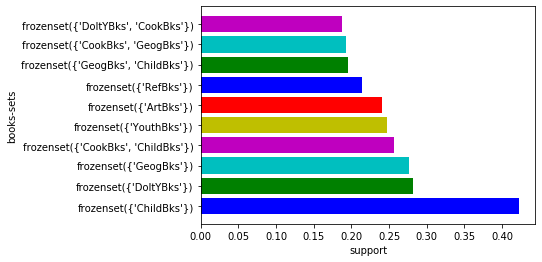

In [10]:
frequent_itemsets_new.sort_values('support', ascending = False,inplace=True)
plt.barh(list(range(1,11)),frequent_itemsets_new.support[1:11],color='bgcmyr');plt.yticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.ylabel('books-sets');plt.xlabel('support')
plt.show()

In [9]:
rules = association_rules(frequent_itemsets_new, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2163,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
2162,"(ItalAtlas, ArtBks)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
3370,"(ItalArt, RefBks)","(ItalAtlas, GeogBks)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
3367,"(ItalAtlas, GeogBks)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
3160,"(ItalCook, ItalAtlas)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
3165,"(ItalArt, RefBks)","(ItalCook, ItalAtlas)",0.0200,0.0230,0.0125,0.625000,27.173913,0.012040,2.605333
2564,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.013930,1.995000
2565,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.013930,3.532727
3839,"(ItalArt, RefBks)","(ItalAtlas, DoItYBks)",0.0200,0.0190,0.0095,0.475000,25.000000,0.009120,1.868571
3838,"(ItalAtlas, DoItYBks)","(ItalArt, RefBks)",0.0190,0.0200,0.0095,0.500000,25.000000,0.009120,1.960000
